In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [ ]:
df = pd.read_csv('property_data.csv')

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


In [ ]:
#Statistical summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,67.982016,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.532006,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,43.475000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,93.875000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


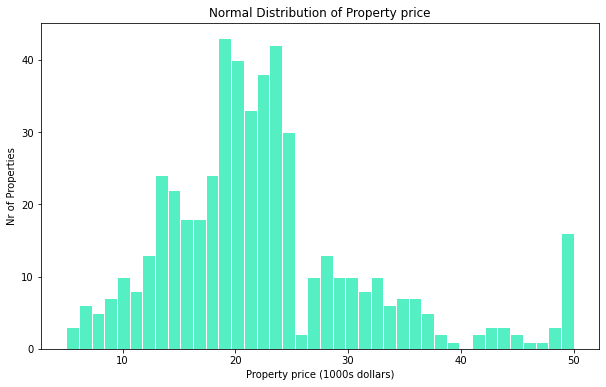

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['MEDV'], bins=40, ec='#ffffff', color='#55efc4')
plt.xlabel('Property price (1000s dollars)')
plt.ylabel('Nr of Properties')
plt.title('Normal Distribution of Property price')
plt.show()

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.336388,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.551745,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.614987,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.091026,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.691167,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.239548,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.336388,-0.551745,0.614987,0.091026,0.691167,-0.239548,1.000000,-0.718843,0.415344,0.467811,0.241226,0.576959,-0.355519
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.718843,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.415344,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.467811,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [ ]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

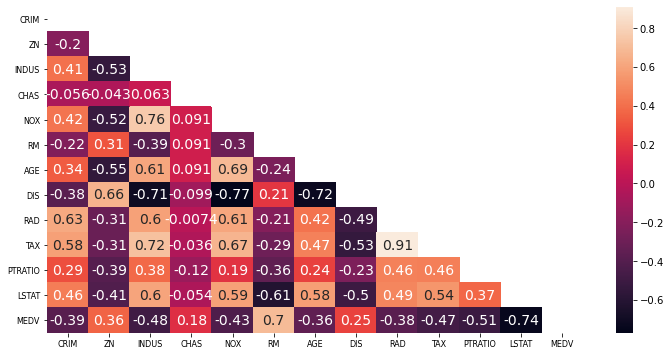

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={'size': 14}) # {'size': 14} is a python dictionary (key/value pair)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

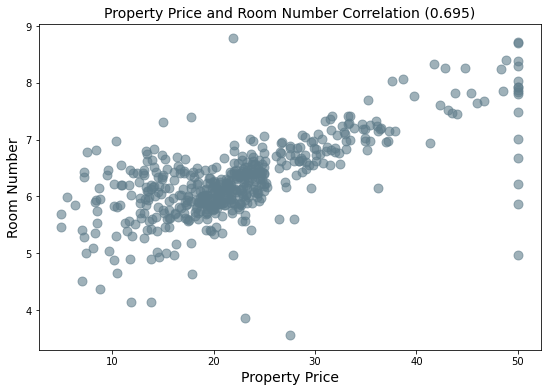

In [ ]:
scorr = round(df['MEDV'].corr(df['RM']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(x=df['MEDV'], y=df['RM'], alpha=0.6, s=80, color='#607D8B')
plt.title(f'Property Price and Room Number Correlation ({scorr})', fontsize=14)
plt.xlabel('Property Price', fontsize=14)
plt.ylabel('Room Number', fontsize=14)
plt.show()

In [ ]:
responses = df['MEDV']
features = df.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, responses,
                                                    test_size=0.2, random_state=30)

len(X_train)/len(features)

0.7984189723320159

In [ ]:
len(X_test)/len(features)

0.2015810276679842

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
#multiy varieble
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.739298985916042
Test data r-squared: 0.6988733716036952
Intercept 43.459187301321165


,coef
CRIM,-0.119563
ZN,0.041000
INDUS,0.014608
CHAS,3.440291
NOX,-19.581264
RM,3.599300
AGE,0.008988
DIS,-1.524038
RAD,0.308395
TAX,-0.013579


In [ ]:
df['MEDV'].skew()

1.1080984082549072

In [ ]:
y_log = np.log(df['MEDV'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: MEDV, dtype: float64

In [ ]:
y_log.skew()

-0.33032129530987864

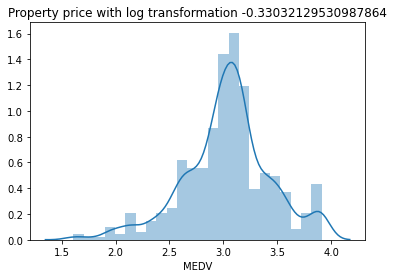

In [ ]:
sns.distplot(y_log)
plt.title(f'Property price with log transformation {y_log.skew()}')
plt.show()

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.739298985916042
Test data r-squared: 0.6988733716036952
Intercept 43.459187301321165


,coef
CRIM,-0.119563
ZN,0.041000
INDUS,0.014608
CHAS,3.440291
NOX,-19.581264
RM,3.599300
AGE,0.008988
DIS,-1.524038
RAD,0.308395
TAX,-0.013579
